In [35]:
import os
import shutil
from PIL import Image
from sklearn.model_selection import train_test_split


In [36]:
# Define base directories
base_dir = r"C:\Users\VINH\Desktop\SHAKYSHAKY\DATA"
output_dir = os.path.join(base_dir, "merged")

In [37]:
# Define dataset sources
data_sources = {
    "healthy": [
        os.path.join(base_dir, "Spiral", "SpiralControl"),
        os.path.join(base_dir, "Meander", "MeanderControl")
    ],
    "parkinson": [
        os.path.join(base_dir, "Spiral", "SpiralPatients"),
        os.path.join(base_dir, "Meander", "MeanderPatients")
    ]
}

In [38]:
def check_corrupted_images(folder_path):
    """Check for corrupted images in a given folder."""
    corrupted_images = []
    for filename in os.listdir(folder_path):
        file_path = os.path.join(folder_path, filename)
        try:
            with Image.open(file_path) as img:
                img.verify()  # Check if the image is corrupted
        except Exception as e:
            corrupted_images.append((filename, str(e)))
    return corrupted_images

In [39]:
# Ensure train/val directories exist
for split in ["train", "val"]:
    for label in ["healthy", "parkinson"]:
        os.makedirs(os.path.join(output_dir, split, label), exist_ok=True)

In [40]:
def merge_and_split(label, folders):
    """Merge and split images into train and validation sets."""
    all_images = []
    for folder in folders:
        for filename in os.listdir(folder):
            if filename.lower().endswith((".png", ".jpg", ".jpeg")):
                file_path = os.path.join(folder, filename)
                all_images.append(file_path)
    # Split into train (70%) and validation (30%)
    train_imgs, val_imgs = train_test_split(all_images, test_size=0.3, random_state=42)

    # Copy files to respective folders
    for img_path in train_imgs:
        shutil.copy(img_path, os.path.join(output_dir, "train", label, os.path.basename(img_path)))
    for img_path in val_imgs:
        shutil.copy(img_path, os.path.join(output_dir, "val", label, os.path.basename(img_path)))

In [41]:
#Check for corrupted images before processing
spiral_controls_path = os.path.join(base_dir, "Spiral", "SpiralControl")
spiral_patients_path = os.path.join(base_dir, "Spiral", "SpiralPatients")
meander_controls_path = os.path.join(base_dir, "Meander", "MeanderControl")
meander_patients_path = os.path.join(base_dir, "Meander", "MeanderPatients")

corrupted_spiral_controls = check_corrupted_images(spiral_controls_path)
corrupted_spiral_patients = check_corrupted_images(spiral_patients_path)
corrupted_meander_controls = check_corrupted_images(meander_controls_path)
corrupted_meander_patients = check_corrupted_images(meander_patients_path)

# Print corrupted images
print("Corrupted images in MeanderControls:", corrupted_meander_controls)
print("Corrupted images in MeanderPatients:", corrupted_meander_patients)
print("Corrupted images in SpiralControls:", corrupted_spiral_controls)
print("Corrupted images in SpiralPatients:", corrupted_spiral_patients)

#Count images before processing
num_meander_controls = len(os.listdir(meander_controls_path))
num_meander_patients = len(os.listdir(meander_patients_path))
num_spiral_controls = len(os.listdir(spiral_controls_path))
num_spiral_patients = len(os.listdir(spiral_patients_path))

print(f"Number of images before processing:")
print(f"Spiral Control: {num_spiral_controls}, Spiral Patients: {num_spiral_patients}")
print(f"Meander Control: {num_meander_controls}, Meander Patients: {num_meander_patients}")

Corrupted images in MeanderControls: [('.DS_Store', "cannot identify image file 'C:\\\\Users\\\\VINH\\\\Desktop\\\\SHAKYSHAKY\\\\DATA\\\\Meander\\\\MeanderControl\\\\.DS_Store'")]
Corrupted images in MeanderPatients: [('.DS_Store', "cannot identify image file 'C:\\\\Users\\\\VINH\\\\Desktop\\\\SHAKYSHAKY\\\\DATA\\\\Meander\\\\MeanderPatients\\\\.DS_Store'")]
Corrupted images in SpiralControls: [('.DS_Store', "cannot identify image file 'C:\\\\Users\\\\VINH\\\\Desktop\\\\SHAKYSHAKY\\\\DATA\\\\Spiral\\\\SpiralControl\\\\.DS_Store'")]
Corrupted images in SpiralPatients: [('.DS_Store', "cannot identify image file 'C:\\\\Users\\\\VINH\\\\Desktop\\\\SHAKYSHAKY\\\\DATA\\\\Spiral\\\\SpiralPatients\\\\.DS_Store'")]
Number of images before processing:
Spiral Control: 73, Spiral Patients: 297
Meander Control: 73, Meander Patients: 297


In [42]:
# Step 3: Merge and split dataset
for label, folders in data_sources.items():
    merge_and_split(label, folders)

In [43]:
print("Preprocessing done! Spiral + Meander merged into train/val.")

Preprocessing done! Spiral + Meander merged into train/val.


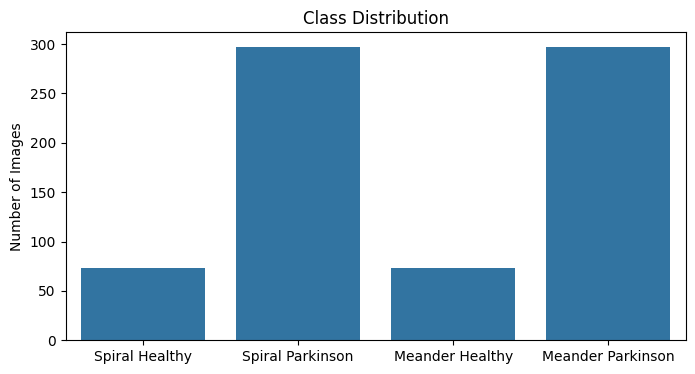

In [44]:
plt.figure(figsize=(8, 4))
sns.barplot(
    x=["Spiral Healthy", "Spiral Parkinson", "Meander Healthy", "Meander Parkinson"],
    y=[num_spiral_controls, num_spiral_patients, num_meander_controls, num_meander_patients]
)
plt.title("Class Distribution")
plt.ylabel("Number of Images")
plt.show()


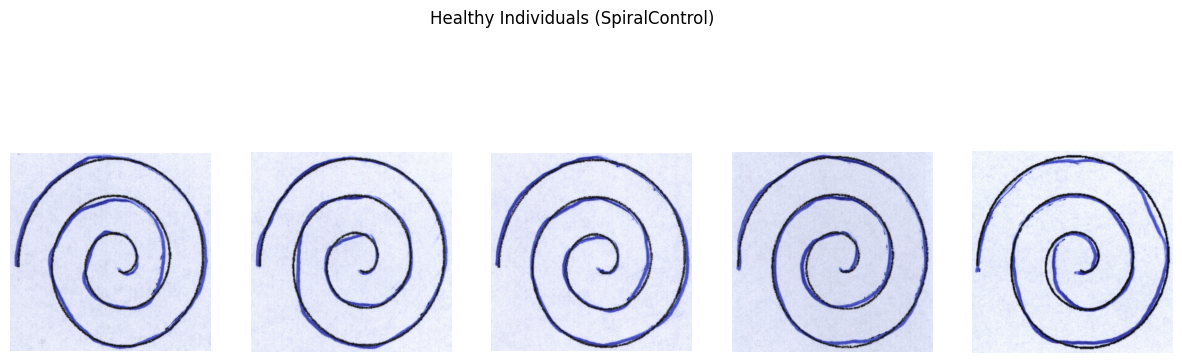

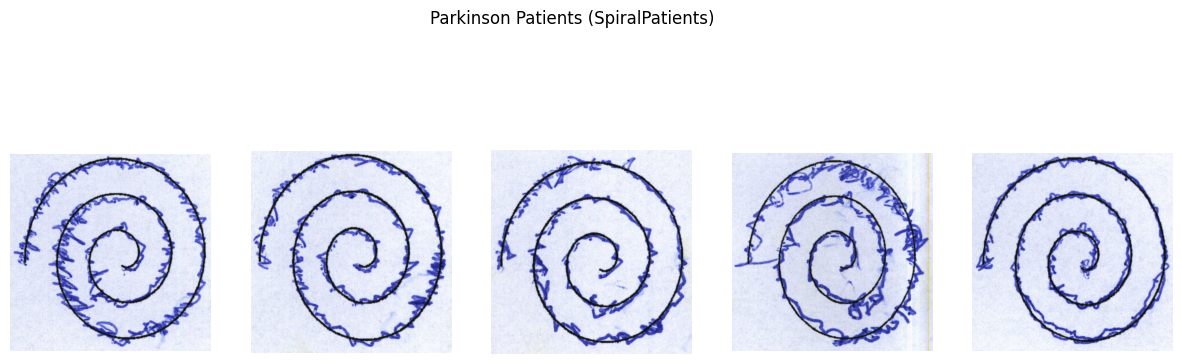

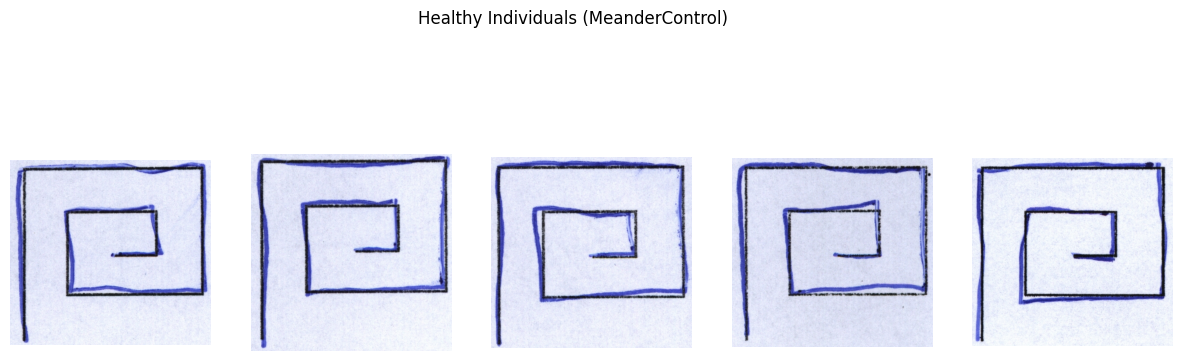

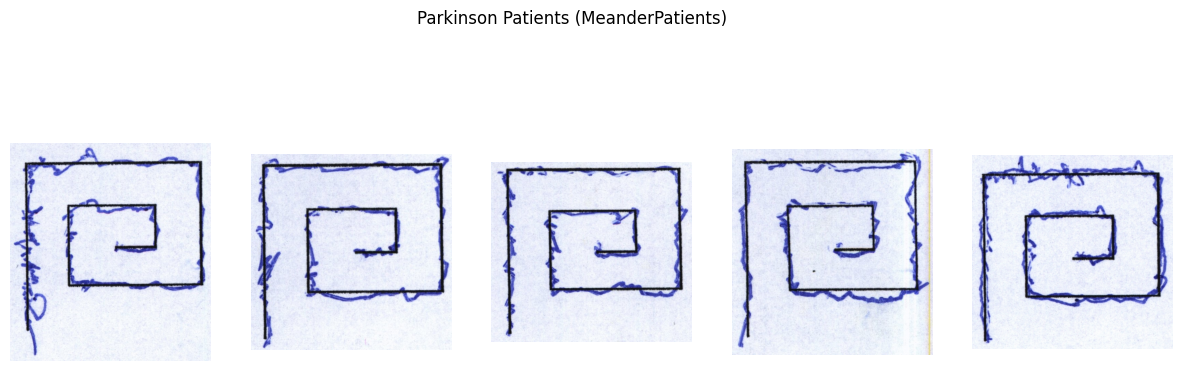

In [45]:
def display_sample_images(folder_path, title, num_samples=5):
    image_files = [f for f in os.listdir(folder_path) if f.endswith('.jpg')]

    num_samples = min(num_samples, len(image_files))

    plt.figure(figsize=(15, 5))
    for i in range(num_samples):
        img_path = os.path.join(folder_path, image_files[i])
        img = cv2.imread(img_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

        plt.subplot(1, num_samples, i + 1)
        plt.imshow(img)
        plt.axis("off")

    plt.suptitle(title)
    plt.show()

display_sample_images(spiral_controls_path, "Healthy Individuals (SpiralControl)")
display_sample_images(spiral_patients_path, "Parkinson Patients (SpiralPatients)")
display_sample_images(meander_controls_path, "Healthy Individuals (MeanderControl)")
display_sample_images(meander_patients_path, "Parkinson Patients (MeanderPatients)")
